[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/NumericalIntegration.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/NumericalIntegration.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Numerical Integration

The definite integral $\int_a^b f(x) dx$ can be computed exactly if the primitive $F$ of $f$ is known, e.g.

In [2]:
f = lambda x: np.divide(np.dot(x,np.exp(x)),np.power(x+1,2))
F = lambda x: np.divide(np.exp(x),(x+1)) 
a = 0; b = 1;
I_ex = F(b) - F(a)
I_ex

0.35914091422952255

In many cases the primitive is unknown though and one has to resort to numerical integration. The idea is to approximate the integrand by a function whose integral is known, e.g. piecewise linear interpolation.

- [Riemans Rule](https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/): sum of rectangles
- [Trapezoid Rule](https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/): sum of trapezoids

or piecewise quadratic interpolation
- [Simpson Rule](https://www.math.ubc.ca/~pwalls/math-python/integration/simpsons-rule/): quadratic polynomial on each subinterval

Trapezoids:

The definite integral of $f(x)$ is equal to the (net) area under the curve $y=f(x)$ over the interval $[a,b]$. Riemann sums approximate definite integrals by using sums of rectangles to approximate the area.

The trapezoid rule gives a better approximation of a definite integral by summing the areas of the trapezoids connecting the points

$$(x_{i-1},0),(x_i,0),(x_{i-1},f(x_{i-1})),(x_i,f(x_1))$$

for each subinterval $[x_{i-1},x_i]$ of a partition. Note that the area of each trapezoid is the sum of a rectangle and a triangle

$$(x_i-x_{i-1})f(x_{i-1}+\frac{1}{2}(x_i-x_{i-1})(f(x_i)-f(x_{i-1}))=\frac{1}{2}(f(x_i)+f(x_{i-1}))(x_i-x_{i-1})$$

For example, we can use a single trapezoid to approximate:

$$\int_0^1=e^{-x^2}dx$$

First, let's plot the curve $y=e^{-x^2}$ and the trapezoid on the interval $[0,1]$:

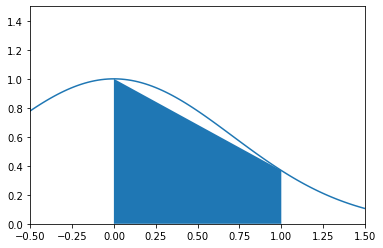

In [3]:
x = np.linspace(-0.5,1.5,100)
y = np.exp(-x**2)
plt.plot(x,y)

x0 = 0; x1 = 1;
y0 = np.exp(-x0**2); y1 = np.exp(-x1**2);
plt.fill_between([x0,x1],[y0,y1])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

Approximate the integral by the area of the trapezoid:

In [4]:
A = 0.5*(y1 + y0)*(x1 - x0)
print("Trapezoid area:", A)

Trapezoid area: 0.6839397205857212


## Trapezoid Rule

This choice leads to the trapezoidal rule. If the interval $[a,b]$ is divided into subintervals $[x_k, x_{k+1}]$ of the same length $h = (b-a)/n$, with $x_0 := a$ and $x_n := b$, the summed version reads

$$\int_a^b f(x) dx \approx \frac{h}{2}(f(a) + f(b)) + h \sum_{k=1}^{n-1} f(x_k) =: T(h). $$

This is implemented in `trapez`. The error of the numerical integral is

$$\left| T(h) - \int_a^b f(x) dx \right| = \frac{(b-a)h^2}{12} |f''(\xi)|, \quad \xi\in[a,b]$$

so if the number of intervals is doubled (and hence $h$ is halved) then the error is expected to decrease by a factor of 4. Let's check:

Let's write a function called trapz which takes input parameters $f,a,b$ and $N$ and returns the approximation $T_N(f)$. Furthermore, let's assign default value $N=50$. ([source](https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/))

In [5]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

Let's test our function on an integral where we know the answer

$$\int_0^1 3x^2 dx=1$$

In [6]:
trapz(lambda x : 3*x**2,0,1,10000)

1.0000000050000002

The SciPy subpackage `scipy.integrate` contains several functions for approximating definite integrals and numerically solving differential equations. Let's import the subpackage under the name `spi`.

In [7]:
import scipy.integrate as spi

The function scipy.integrate.trapz computes the approximation of a definite by the trapezoid rule. Consulting the documentation, we see that all we need to do it supply arrays of $x$ and $y$ values for the integrand and `scipy.integrate.trapz` returns the approximation of the integral using the trapezoid rule. The number of points we give to `scipy.integrate.trapz` is up to us but we have to remember that more points gives a better approximation but it takes more time to compute!

In [8]:
N = 10000; a = 0; b = 1;
x = np.linspace(a,b,N+1)
y = 3*x**2
approximation = spi.trapz(y,x)
print(approximation)

1.000000005


## Simpson Rule

Simpson's rule uses a quadratic polynomial on each subinterval of a partition to approximate the function $f(x)$ and to compute the definite integral. This is an improvement over the trapezoid rule which approximates $f(x)$ by a straight line on each subinterval of a partition.

Here $[a,b]$ is divided into an even number $2n$ of intervals, so $h=(b-a)/(2n)$. 

The formula for Simpson's rule is

$$\int_a^b f(x) dx \approx \frac{h}{3} \left( f(a) + f(b) + 4 \sum_{k=1}^{n} f(x_{2k-1}) + 2 \sum_{k=1}^{n-1} f(x_{2k}) \right) =: S(h). $$

The error goes like $h^4$ (instead of $h^2$ for the trapezoidal rule):

$$\left| S(h) - \int_a^b f(x) dx \right| = \frac{(b-a)h^4}{180} |f^{(4)}(\xi)|, \quad \xi\in[a,b].$$

So when the number of intervals is doubled, the error should decrease by a factor of 16:

Let's write a function called simps which takes input parameters $f,a,b$ and $N$ and returns the approximation $S_N(f)$. Furthermore, let's assign a default value $N=50$.

In [9]:
def simps(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    where x_i = a + i*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.

    Examples
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

Let's test our function on an integral where we know the answer

$$\int_0^1 3x^2 dx=1$$

In [10]:
simps(lambda x : 3*x**2,0,1,10)

1.0

The SciPy subpackage `scipy.integrate` contains several functions for approximating definite integrals and numerically solving differential equations. Let's import the subpackage under the name spi.

In [11]:
import scipy.integrate as spi

The function `scipy.integrate.simps` computes the approximation of a definite integral by Simpson's rule. Consulting the documentation, we see that all we need to do it supply arrays of $x$ and $y$ values for the integrand and `scipy.integrate.simps` returns the approximation of the integral using Simpson's rule.

In [12]:
N = 10; a = 0; b = 1;
x = np.linspace(a,b,N+1)
y = 3*x**2
approximation = spi.simps(y,x)
print(approximation)

1.0
